## Section10: Classification
- Support Vector Machine
- Naive Bayes Classifier

### Support Vector Machine
- Supervised learning algorithm
- Used for classification or regression
- They are discriminative classifiers 
    - they draw a boundary between clusters of data
    - construct **separating hyperplane** that has the largest distance to the nearest training data point of any class (margin).

In [226]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import confusion_matrix

import datetime


### Linearly separable data
- Created data randomly 
- Selected data that give visually separate cluster for illustration

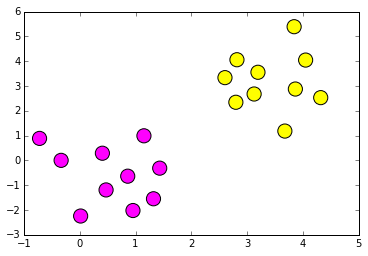

In [93]:
np.random.seed(1234)
#feature
X = np.random.randn(20,2)
#label
y = [-1]*10
y.extend([1]*10)
y = np.array(y)

X[y==1,:] = X[y==1,:] +3

plt.scatter(X[:,0], X[:,1], c=y, s=200, cmap='spring')
plt.show()


### Goal -1:  Find hyperplane that serves as a decision boundary for the data points
- Equation of hyperplane
    - ### $2D : ax_1 + bx_2 = c$
    - ### $3D: ax_1 + bx_2 + cx_3 = d$
- ### $w^T x + b = 0$
    - ### $w = (w_1, w_2, ..., w_n)$
    - ### $x = (x_1, x_2, ..., x_n)$

- Discriminative classifier attempts to draw a line (for 2D case) that separates cluster of data points.
- infinite possibilities

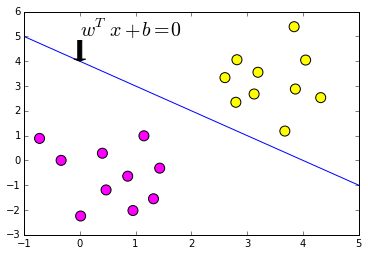

In [94]:
xp = np.linspace(-1, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='spring')
m = -1
b = 4
yp = m*xp + b
plt.plot(xp, yp)
plt.annotate('$w^Tx + b = 0$', xy=(0, 4), xytext=(0, 5), size=20,
            arrowprops=dict(facecolor='black', shrink=0.005),
            )
plt.xlim(-1, 5)
plt.show()

### Linear Classifier
- ### $y = w^T x + b$
    - y -> label
- Decision hyperplane: $w^T x + b = 0$
- If we know $w$ and $b$, we can classify any data point based on above or below the hyperplane

### Issue: infinite posibilities

(-1, 5)

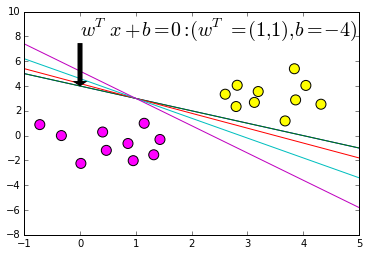

In [95]:
xp = np.linspace(-1, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='spring')

m = -1
b = 4
yp = m*xp + b
plt.annotate('$w^Tx + b = 0 : (w^T=(1, 1), b=-4)$', xy=(0, 4), xytext=(0, 8), size=20,
            arrowprops=dict(facecolor='black', shrink=0.005),
            )
for i in range(5):
    plt.plot(xp, yp)
    m = m-0.2*i
    b = b+0.2*i
    yp = m*xp + b
    print

yp = m*xp + b
plt.xlim(-1, 5)

### Goal-2: Maximizing Margin
- a region of some width around the hyperplane  

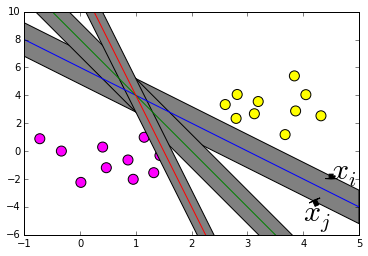

In [96]:
xp = np.linspace(-1, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='spring')

m = -2; b = 6
for i in range(3):
    yp = m*xp + b
    plt.plot(xp,yp)
    plt.fill_between(xp, yp - 1.2, yp + 1.2, facecolor='gray')
    m = m-2*(i+1)
    b = b+2*(i+1)
plt.annotate('$x_i$', xy=(4.5, -2), xytext=(4.5,-2), size=30,
            arrowprops=dict(facecolor='black', shrink=0.000),
            )
plt.annotate('$x_j$', xy=(4.2, -3.5), xytext=(4.0,-5), size=30,
            arrowprops=dict(facecolor='black', shrink=0.000),
            )
plt.xlim(-1, 5);
plt.ylim(-6, 10);

### Determine weighting vector $w$ 
- choose vector normal to the decision hyperplane
- two data classes are labeled $y_i = \{1, -1\}$ 
    - ### $C_1: w^T x_i + b \ge 1$
    - ### $C_2: w^T x_j + b \le -1$
- ### $w^T (x_i - x_j) = 2$
- ### ${\frac{w^T}{\left\|w\right\|}}(xi - xj) = {\frac{2}{\left\|w\right\|}}$

- 
- minimize 
    - ### ${\frac{1}{2}}{\left\|w\right\|}^2=\frac{1}{2}w^Tw$ 
- subject to the constraint
    - ### $y_i(w^T x_i + b) \ge 1$
- Quadratic optimization

**(see class presentation for more detail)**

### Scikit-Learn linear SVM classifier using the above data

In [127]:
from sklearn.svm import SVC # "Support Vector Classifier"
#use all data as training set except the last one.
X_train = X[:-1]
y_train = y[:-1]
#the last data for testing
X_test = X[-1]
y_test = y[-1:]

clf = SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [128]:
# Make an array of predictions on the test set
from sklearn.metrics import accuracy_score
pred = clf.predict(X_train)
# Output the hit-rate and the confusion matrix for the model
print((clf.score(X_train, y_train)), '\n')
print(accuracy_score(y_train, pred, normalize=False),'\n')
print(confusion_matrix(pred, y_train))


1.0 

19 

[[10  0]
 [ 0  9]]


In [155]:
### Predict using test data
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred, normalize=False),'\n')

1 



### Visualize prediction

In [160]:
#Source: https://www.oreilly.com/learning/intro-to-svm
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([xi, yj])
            
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

### Support vectors - input data points that lie on the decision boundaries. 
    - Only the support vector matter in SVM.
    - Moving other points, with out crossing the decision boundary, has no effect on the classification

[[ 1.15003572  0.99194602]
 [ 2.79735368  2.34403066]
 [ 3.67555409  1.18297277]]


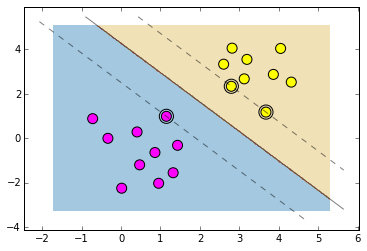

In [162]:
# data points for mesh plot 
step = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
X, Y = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

Z = clf.predict(np.c_[X.ravel(), Y.ravel()]) #flatten and concatenate

# Showing results using color plot
Z = Z.reshape(X.shape)
plt.contourf(X, Y, Z, cmap=plt.cm.Paired, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=100, cmap='spring')

plot_svc_decision_function(clf)

# Support vectors: Input vectors that touch the boundary
sv = clf.support_vectors_
print(sv)
plt.scatter(sv[:, 0], sv[:, 1], s=200, facecolors='none');
plt.show()

In [166]:
clf.predict([3,4.5])

array([1])

## Linearly inseparble
- consider data that is not linearly separable

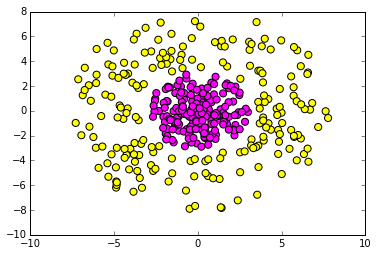

In [183]:

np.random.seed(1234)
theta = 2*np.pi*np.random.uniform(0,1, 200)
r = np.random.uniform(0.2,3,200)
a = r*np.cos(theta)
b = r*np.sin(theta)
X = np.array(list(zip(a,b)))

np.random.seed(12)
theta = 2*np.pi*np.random.uniform(0,1, 200)
r2 = np.random.uniform(3.5,8,200)
a = r2*np.cos(theta)
b = r2*np.sin(theta)
x2 = np.array(list(zip(a,b)))

X = np.vstack([X, x2])

y = [-1]*200
y.extend([1]*200)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='spring')
plt.show()


In [184]:
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1]
y_test = y[-1:]

In [ ]:
### Learn using linear kernel

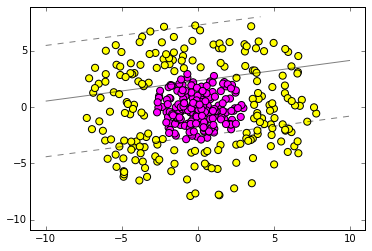

In [185]:
# fit the model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.show()

### Using non-linear kernel
- Gain linearly separation by mapping the data to a higher dimensional space
- The dot product between the features is replaced by kernel function

#### Gaussian Kernel - rbf in scikit learn
- Parameters
    - $C$ is a parameter for soft margin cost function
    - $\gamma$ is the free parameter of the Gaussian radial basis function
        - ### $K(X,X') = exp\left(\gamma \left\| X-X \right\|_2^2\right)$

In [207]:
# fit the model
clf = SVC(kernel='rbf')
#clf = SVC(C = 1000, gamma = 10.0, kernel='rbf')
clf.fit(X_train, y_train) #use all data except the last one as a training set

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

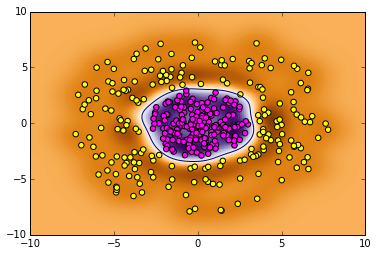

In [208]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 500),
                     np.linspace(-10, 10, 500))
np.random.seed(0)


# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=1,
                       linetypes='--')
plt.scatter(X_train[:, 0], X_train[:, 1], s=30, c=y_train, cmap='spring')
plt.axis([-10, 10, -10, 10])
plt.show()

In [210]:
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred, normalize=False),'\n')

1 



In [211]:
clf.predict([0,0])


array([-1])

### Classification Algorithms Example to Predict Market Direction of financial time series
- Binary supervised classification
- Attempt to predict whether the percentage return for a particular future day is positive or negative.
- To assess predction we use Hit-Rate and Confusion Matrix

[more detail can be found in "Successful Algorithmic Trading" by Michael Halls Moore](https://www.quantstart.com/successful-algorithmic-trading-ebook)

### Load data Using Yahoo-Finance
- [Source: on how to load data using pandas can be found in pandas documenatation page](http://pandas.pydata.org/pandas-docs/stable/remote_data.html)

In [340]:
import pandas.io.data as web
import datetime
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2015, 11, 6)
symbol = "AMZN"
amzn = web.DataReader(symbol, "yahoo", start,end)
amzn.ix['2015-11-06']

Open             655.000000
High             662.260010
Low              652.000000
Close            659.369995
Volume       4082300.000000
Adj Close        659.369995
Name: 2015-11-06 00:00:00, dtype: float64

### Examine the data

In [341]:
amzn.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,81.5000,89.5625,79.046883,89.3750,16117600,89.3750
2000-01-04,85.3750,91.5000,81.750000,81.9375,17487400,81.9375
2000-01-05,70.5000,75.1250,68.000000,69.7500,38457400,69.7500
2000-01-06,71.3125,72.6875,64.000000,65.5625,18752000,65.5625
2000-01-07,67.0000,70.5000,66.187500,69.5625,10505400,69.5625


In [342]:
amzn[["Volume", "Adj Close"]].head()

,Volume,Adj Close
Date,,
2000-01-03,16117600,89.3750
2000-01-04,17487400,81.9375
2000-01-05,38457400,69.7500
2000-01-06,18752000,65.5625
2000-01-07,10505400,69.5625


### Set up a dataframe that holds the current prices and prices from the last few days.

In [343]:
amzn_df = pd.DataFrame(index=amzn.index)
amzn_df["Current Price"] = amzn["Adj Close"]
amzn_df["Volume"] = amzn["Volume"]

amzn_df.head()

,Current Price,Volume
Date,,
2000-01-03,89.3750,16117600
2000-01-04,81.9375,17487400
2000-01-05,69.7500,38457400
2000-01-06,65.5625,18752000
2000-01-07,69.5625,10505400


### prices of the last five days are arranged as a row
- Each sample contains predictors Day-1, Day-2, ... for the last 5 days.
- target price for training: Current Price (to be modified as up/down)

In [344]:
for i in range(0, 5):
    amzn_df["Day-%s" % str(i+1)] = amzn["Adj Close"].shift(i+1).pct_change()*100.0

amzn_df["Current Price"] = amzn_df["Current Price"].pct_change()*100.0

amzn_df.head()

,Current Price,Volume,Day-1,Day-2,Day-3,Day-4,Day-5
Date,,,,,,,
2000-01-03,NaN,16117600,NaN,NaN,NaN,NaN,NaN
2000-01-04,-8.321678,17487400,NaN,NaN,NaN,NaN,NaN
2000-01-05,-14.874142,38457400,-8.321678,NaN,NaN,NaN,NaN
2000-01-06,-6.003584,18752000,-14.874142,-8.321678,NaN,NaN,NaN
2000-01-07,6.101049,10505400,-6.003584,-14.874142,-8.321678,NaN,NaN


### Remove rows with NaN

In [345]:
amzn_df = amzn_df[~np.isnan(amzn_df['Day-5'])]
amzn_df.head()

,Current Price,Volume,Day-1,Day-2,Day-3,Day-4,Day-5
Date,,,,,,,
2000-01-11,-3.523035,10532700,-0.539084,6.101049,-6.003584,-14.874142,-8.321678
2000-01-12,-4.775281,10804500,-3.523035,-0.539084,6.101049,-6.003584,-14.874142
2000-01-13,3.736480,10448100,-4.775281,-3.523035,-0.539084,6.101049,-6.003584
2000-01-14,-2.559242,6853600,3.736480,-4.775281,-3.523035,-0.539084,6.101049
2000-01-18,-0.194553,5384900,-2.559242,3.736480,-4.775281,-3.523035,-0.539084


### Adjust the target (current Price) to have values 1 or -1 for classification and change the label to Direction
 - Up : 1
 - Down : -1


In [346]:
#amzn_df.loc[amzn_df['Current Price'] < amzn_df['Day-1'], 'Current Price'] = -1
#amzn_df.loc[amzn_df['Current Price'] >= amzn_df['Day-1'], 'Current Price'] = 1
amzn_df["Current Price"] = np.sign(amzn_df["Current Price"])
amzn_df = amzn_df.rename(columns={'Current Price': 'Direction'})
amzn_df.head()

,Direction,Volume,Day-1,Day-2,Day-3,Day-4,Day-5
Date,,,,,,,
2000-01-11,-1,10532700,-0.539084,6.101049,-6.003584,-14.874142,-8.321678
2000-01-12,-1,10804500,-3.523035,-0.539084,6.101049,-6.003584,-14.874142
2000-01-13,1,10448100,-4.775281,-3.523035,-0.539084,6.101049,-6.003584
2000-01-14,-1,6853600,3.736480,-4.775281,-3.523035,-0.539084,6.101049
2000-01-18,-1,5384900,-2.559242,3.736480,-4.775281,-3.523035,-0.539084


In [347]:
# Use the prior two days of returns as predictor 
# values, with direction as the response
amzn_df.loc[amzn_df['Direction'] == 0, 'Direction'] = 1
#X = amzn_df[["Day-1", "Day-2", "Day-3", "Day-4"]]
X = amzn_df[["Day-1", "Day-2"]]
y = amzn_df["Direction"]    

In [348]:
              
start_test = datetime.datetime(2015,6,1)

    # Create training and test sets
X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]  


m = SVC(
    C=1000, cache_size=200, class_weight=None,
    coef0=0.0, degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False
    )
    
m.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [349]:
pred = m.predict(X_train)
print(X_train.head(), '\n', y_train.head(), '\n')
# Output the hit-rate and the confusion matrix for the model
print((m.score(X_train, y_train)), '\n')
print(confusion_matrix(pred, y_train))

               Day-1     Day-2
Date                          
2000-01-11 -0.539084  6.101049
2000-01-12 -3.523035 -0.539084
2000-01-13 -4.775281 -3.523035
2000-01-14  3.736480 -4.775281
2000-01-18 -2.559242  3.736480 
 Date
2000-01-11   -1
2000-01-12   -1
2000-01-13    1
2000-01-14   -1
2000-01-18   -1
Name: Direction, dtype: float64 

0.513052468338 

[[ 629  582]
 [1302 1356]]


In [350]:
# Make an array of predictions on the test set
pred = m.predict(X_test)
print(X_test.head(), '\n', y_test.head(), '\n')

# Output the hit-rate and the confusion matrix for the model
print((m.score(X_test, y_test)), '\n')
print(confusion_matrix(pred, y_test))


               Day-1     Day-2
Date                          
2015-06-01  0.623580 -1.124196
2015-06-02  0.393729  0.623580
2015-06-03  0.016239  0.393729
2015-06-04  1.299336  0.016239
2015-06-05 -1.330767  1.299336 
 Date
2015-06-01    1
2015-06-02    1
2015-06-03    1
2015-06-04   -1
2015-06-05   -1
Name: Direction, dtype: float64 

0.53982300885 

[[15 19]
 [33 46]]


## Naive Bayes Classifier
- Supervised learning algorithm
- probabilistic classifier - conditional probability model
- $X = (x_1, x_2, x_3, ..., x_n)$  - n features
- Determine $p(C_k | x_1, x_2, x_3, ..., x_n)$ for each $k$
- Using Bayesian Theorem:
### - $p(C_k|X) = \frac{p(C_k)p(X|C_k)}{p(X)}$
- Classification: assign an observation X to the class for which $p(C_k | X)$ is the largest as the target

### Need to specify
- prior: $p(C_k)$
    - equiprobable classes :   $p(C_k) = 1/K$ - Total of $K$ classes
    - using the training set:  $p(C_k) = N_k/\sum_{k} N_k$
        - proportion of training observations that belong to the $k^{th}$ class
- likelihood: $p(X|C_k)$
- evidence: p(X)
    - does not depend on $C_k$ and $X$ is given, so effecitvely constant 

### Naive Bayes Assumption - conditionally independent features
- features are independent to each other
- ### $p(X|C_k) = {\Pi_{i=1}^n p(x_i | C_k)}$
### $p(C_k|X) = \frac{p(C_k){\Pi_{i=1}^n p(x_i | C_k)}}{p(X)}$

### Maximum a posteriori (MAP) decision rule
- ### $\underset{k \in \{1, 2, ..., K\}}{\operatorname{argmax}}  {p(C_k){\Pi_{i=1}^n p(x_i | C_k)}}$

### Assumptions on distribution of features - $p(x_i|C_k)$
- Event models of the Naive Bayes classifier
    - Gaussian Naive Bayes
    - Multinomial Naive Bayes
    - Bernoulli Naive Bayes

[More detaile can be found here](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) 

### Stock prediction using Gaussian Naive Bayes

In [351]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb_clf = gnb.fit(X_train, y_train)
y_pred = nb_clf.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 3869 points : 1875


In [355]:
# Output the hit-rate and the confusion matrix for the training set
print((nb_clf.score(X_train, y_train)), '\n')
print(confusion_matrix(y_pred, y_train), '\n')

0.515378650814 

[[ 631  575]
 [1300 1363]] 



In [356]:
# Make an array of predictions on the test set
pred = nb_clf.predict(X_test)

print(X_test.head(), y_test.head(), '\n')

# Output the hit-rate and the confusion matrix for the test set
print((nb_clf.score(X_test, y_test)), '\n')
print(confusion_matrix(pred, y_test), '\n')

               Day-1     Day-2
Date                          
2015-06-01  0.623580 -1.124196
2015-06-02  0.393729  0.623580
2015-06-03  0.016239  0.393729
2015-06-04  1.299336  0.016239
2015-06-05 -1.330767  1.299336 Date
2015-06-01    1
2015-06-02    1
2015-06-03    1
2015-06-04   -1
2015-06-05   -1
Name: Direction, dtype: float64 

0.530973451327 

[[10 15]
 [38 50]] 



### Stock prediction using Multinomial Naive Bayes

In [364]:
#from sklearn.naive_bayes import MultinomialNB
#mnb_clf = MultinomialNB()
#mnb_clf.fit(X_train, y_train)
#y_pred = mnb_clf.predict(X_train)
#print("Number of mislabeled points out of a total %d points : %d"
#      % (X_train.shape[0],(y_train != y_pred).sum()))

In [363]:
# Make an array of predictions on the test set
#pred = mnb_clf.predict(X_test)

#print(X_test.head(), y_test.head(), '\n')
# Output the hit-rate and the confusion matrix for the test set
#print((mnb_clf.score(X_test, y_test)), '\n')
#print(confusion_matrix(pred, y_test), '\n')

### Stock prediction using Bernoulli Naive Bayes

In [359]:
from sklearn.naive_bayes import BernoulliNB
bnb_clf = BernoulliNB()
bnb_clf.fit(X_train, y_train)
y_pred = bnb_clf.predict(X_train)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_train.shape[0],(y_train != y_pred).sum()))

Number of mislabeled points out of a total 3869 points : 1914


In [360]:
# Output the hit-rate and the confusion matrix for the training set
print((bnb_clf.score(X_train, y_train)))
print('')
print(confusion_matrix(y_pred, y_train))

0.505298526751

[[ 466  449]
 [1465 1489]]


In [361]:
# Make an array of predictions on the test set
pred = bnb_clf.predict(X_test)

print(X_test.head(), y_test.head(), '\n')

# Output the hit-rate and the confusion matrix for the test set
print((bnb_clf.score(X_test, y_test)), '\n')
print(confusion_matrix(pred, y_test))

               Day-1     Day-2
Date                          
2015-06-01  0.623580 -1.124196
2015-06-02  0.393729  0.623580
2015-06-03  0.016239  0.393729
2015-06-04  1.299336  0.016239
2015-06-05 -1.330767  1.299336 Date
2015-06-01    1
2015-06-02    1
2015-06-03    1
2015-06-04   -1
2015-06-05   -1
Name: Direction, dtype: float64 

0.548672566372 

[[18 21]
 [30 44]]
